# Linear Algebra, Calculus, and Gradient Descent

__Objectives__
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">



It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Also matrices are the common notation used in the popular libraries like numpy, scipy and sklearn.

<img src = "./resources/matrix_multiplication.png">


This is an image from Andrew Ng's Neural Networks and Deep Learning course.

<img src = "./resources/gradient_descent.png" width  = 500>

This is an image from Andrew Ng's Sequence Model's Course. 

<img src = "./resources/lstm.png" width  = 500>

## Linear algebra and Linear Regression

- Let's move to the notebook matrix algebra with numpy :)

## Gradient Descent

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

## Gradient in Action

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
numPoints=10
np.zeros(shape=numPoints)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + np.random.uniform(0, 1) * variance
    return x, y

In [4]:
x = np.random.uniform(low =0, high=1, size = 1000)

y = 10*x + 25 + np.random.normal(loc = 0, scale = 1, size = 1000)

In [9]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)

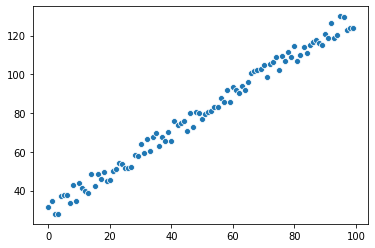

In [10]:
sns.scatterplot(x=x[:, 1], y=y)

plt.show()

In [11]:
print(x.shape)
theta = np.array([1.90595185,1.5342646])
np.dot(x, theta).shape

(100, 2)


(100,)

__Your Turn__

Write a gradient descent function for this linear problem

- Inputs:
x, y, theta: initialized with some random values, alpha: learning rate, m: length of data, numiterations: number of iterations

- return: plot the errors for each iterations
- return the final theta values

In [17]:
# %load -r 1-20 supplement.py
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % (numIterations // 20) == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
        costs.append(cost)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))])

    return theta

Iteration 0 | Cost: 681.158281
[37.0595185  1.5342646]
Iteration 5000 | Cost: 9.992553
[36.20300036  0.90847919]
Iteration 10000 | Cost: 8.877813
[35.45700846  0.91972617]
Iteration 15000 | Cost: 8.012872
[34.79989444  0.92963318]
Iteration 20000 | Cost: 7.341753
[34.22106935  0.93835986]
Iteration 25000 | Cost: 6.821023
[33.71120579  0.94604684]
Iteration 30000 | Cost: 6.416981
[33.26208766  0.95281799]
Iteration 35000 | Cost: 6.103479
[32.86647771  0.95878242]
Iteration 40000 | Cost: 5.860230
[32.51800095  0.96403624]
Iteration 45000 | Cost: 5.671489
[32.2110419   0.96866412]
Iteration 50000 | Cost: 5.525042
[31.94065412  0.97274063]
Iteration 55000 | Cost: 5.411412
[31.70248049  0.97633147]
Iteration 60000 | Cost: 5.323245
[31.49268299  0.97949449]
Iteration 65000 | Cost: 5.254835
[31.30788089  0.98228067]
Iteration 70000 | Cost: 5.201755
[31.1450962  0.9847349]
Iteration 75000 | Cost: 5.160570
[31.00170578  0.98689673]
Iteration 80000 | Cost: 5.128613
[30.87539897  0.988801  ]
Iter

array([30.50376833,  0.9944039 ])

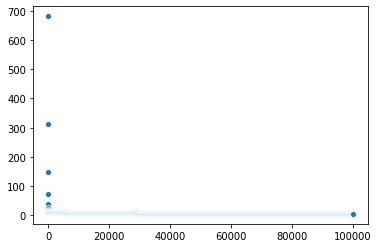

In [18]:
numIterations = 100000
alpha = 0.0001
theta = np.array([37.0595185,1.5342646])
a = gradientDescent(x, y, theta, alpha, m, numIterations)
a

Let's compare the results with the sklearn.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression(fit_intercept= False)
lr.fit(x,y)
print(lr.coef_)


[29.94155613  1.00288012]
